In [1]:
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
%matplotlib inline

In [2]:
# 95% confident level
conf_95 = norm.ppf(0.975)

In [3]:
def R(resistance, tolerance = 5):
    delta = resistance * (tolerance / 100)
    std = delta / conf_95
    return np.random.normal(resistance, std)

In [4]:
def pltHist(data, title):
    _, ax = plt.subplots(1,1, figsize=(18, 9))

    ax.set_title(title)
    ax.set_xlabel("Current (A)")
    ax.set_ylabel("$Probability$")

    ax.hist(data, density=True, bins=400, label='Data')


    mn, mx = plt.xlim()
    kde_xs = np.linspace(mn, mx, 400)
    kde = st.gaussian_kde(data)

    ax.plot(kde_xs, kde.pdf(kde_xs), label="PDF", linewidth=4.0)
    ax.legend(loc="upper left")


    ax.grid()

<br>
<hr>
<br>

In [5]:
def gen_random_trigger(tol = 5):
    shunt = R(0.01, 1) # shunt resistor of 10 milli ohm with 1% tollerence
    R1, R2, R_, Rf = R(36e3, tol), R(1e3, tol), R(1e3, tol), R(36e3, tol)
    
    r = R(13.1e3, tol)
    trigger = 10 * r / (r + R(20e3, tol))
    
    v2 = (trigger + 10*Rf/R_) * (R_ * (R1 + R2)) / (R1 * (R_ + Rf))
    
    current = (v2 - 10)/shunt
    
    return current

In [10]:
random_trigs = np.zeros(shape=2000)
for i in range(2000):
    random_trigs[i] = gen_random_trigger(1)
    
mean = np.mean(random_trigs)
std = np.std(random_trigs)

print(f"Mean                (μ)    = {mean}")
print(f"Standard deviaton   (σ)    = {std}")

Mean                (μ)    = 10.984462973526256
Standard deviaton   (σ)    = 0.24570724183644685


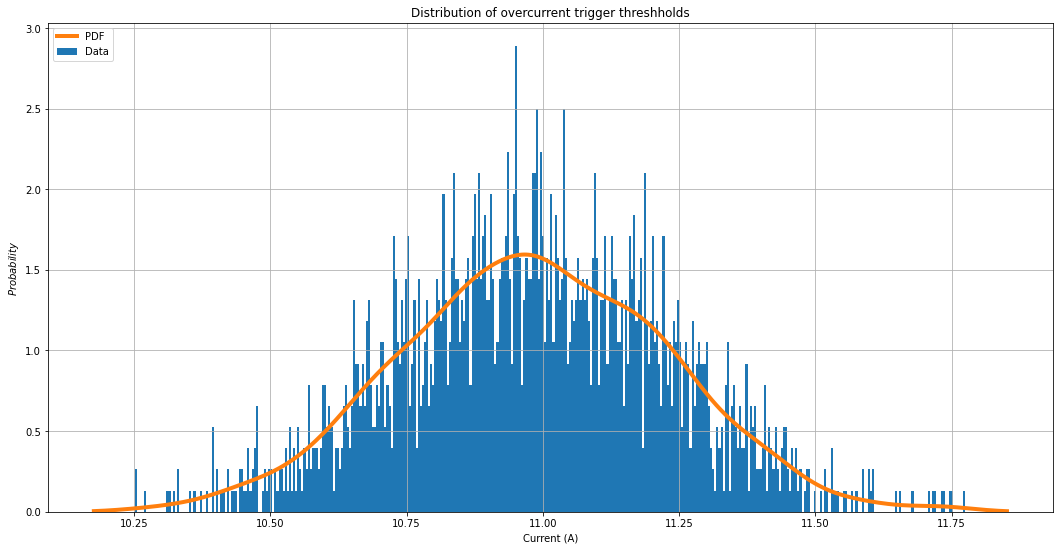

In [11]:
pltHist(random_trigs, "Distribution of overcurrent trigger threshholds")

In [12]:
R(10)

9.875599348789777